In [1]:
import pandas as pd 
from clear_txt import *
from data_path import *
from to_chart import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ademoguzhanozdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=migros_raw_products

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15387 entries, 4402 to 3569
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 15387 non-null  object 
 1   urunKategorileri       15387 non-null  object 
 2   urunKategorileriTwo    15385 non-null  object 
 3   urunKategorileriThree  14945 non-null  object 
 4   urunKategorileriFour   8745 non-null   object 
 5   urunKategorileriFive   7 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                15385 non-null  object 
 9   urunAciklama           12935 non-null  object 
 10  urunFoto               15387 non-null  object 
 11  urunURL                15385 non-null  object 
 12  Unnamed: 8             0 non-null      float64
dtypes: float64(3), object(10)
memory usage: 1.6+ MB


## Null Marka ve Ürün Adlarını Temizledim


In [4]:
df = df.dropna(subset=['uMarka'])
df = df.dropna(subset=['urunAdi'])

In [5]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15385 entries, 4402 to 3569
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   uMarka                 15385 non-null  bool 
 1   urunKategorileri       15385 non-null  bool 
 2   urunKategorileriTwo    15385 non-null  bool 
 3   urunKategorileriThree  15385 non-null  bool 
 4   urunKategorileriFour   15385 non-null  bool 
 5   urunKategorileriFive   15385 non-null  bool 
 6   urunKategorileriSix    15385 non-null  bool 
 7   urunKategorileriSeven  15385 non-null  bool 
 8   urunAdi                15385 non-null  bool 
 9   urunAciklama           15385 non-null  bool 
 10  urunFoto               15385 non-null  bool 
 11  urunURL                15385 non-null  bool 
 12  Unnamed: 8             15385 non-null  bool 
dtypes: bool(13)
memory usage: 315.5 KB


## Unnamed Kolonunu Sildim

In [6]:
del df['Unnamed: 8']

### Unique Kategorilere Bakalım

In [7]:
df.nunique()

uMarka                    1394
urunKategorileri            14
urunKategorileriTwo         88
urunKategorileriThree      421
urunKategorileriFour       563
urunKategorileriFive         3
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15209
urunAciklama             12153
urunFoto                 15077
urunURL                  15219
dtype: int64

#### 10 Ana Kategori Olması Gerekirken 14 Gözüküyor. Temizleyelim  

In [8]:
def unique(list1):
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [9]:
unique(df["urunKategorileri"])


Ev, Pet
Kağıt, Kozmetik
Gıda, Şekerleme
Bebek, Oyuncak
Deterjan, Temizlik
İçecek
Süt, Kahvaltılık
Shoulders
Meyve, Sebze
Et, Tavuk, Balık
Bugün Eklenenler
Elektronik
Oreal
Guy


In [10]:
df[df["urunKategorileri"]=='Elektronik']

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
4058,Electrolux,Elektronik,Elektrikli Ev Aletleri,Süpürge,NaN,NaN,NaN,NaN,Electrolux Eufc81db Elektrikli Süpürge - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/electrolux-eufc81db-...
118,i'think,Elektronik,Görüntü Ve Ses Sistemleri,Kulaklık,NaN,NaN,NaN,NaN,i'think New Universal Mikrofonlu Kulaklık - Mi...,&lt;p&gt;I';think New Universal Mikrofonlu Kul...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-new-universal...
4184,Apple,Elektronik,Telefon Ve Aksesuarları,Telefon,NaN,NaN,NaN,NaN,Iphone 12 Mini 64 Gb Yeşil Cep Telefonu - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/iphone-12-mini-64-gb...
4176,Joysidea,Elektronik,"Isıtma, Soğutma",Isıtıcılar,NaN,NaN,NaN,NaN,Joysidea Quartz 1400W Elektrikli Isıtıcı - Migros,&lt;p&gt;1400W&lt;/p&gt;&lt;p&gt;Enerji tasarr...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/joysidea-quartz-1400...
4055,Xiaomi,Elektronik,Elektrikli Ev Aletleri,Süpürge,NaN,NaN,NaN,NaN,Xiaomi Mi Vacuum-mop 1C Robot Süpürge - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/xiaomi-mi-vacuum-mop...
4061,Urban Mood,Elektronik,Elektrikli Ev Aletleri,Kişisel Bakım,Diğer Kişisel Bakım Cihazları,NaN,NaN,NaN,Urban Mood Ultrasonic Şarjlı Yüz Temizleme Cih...,"&lt;p&gt;&lt;span style="";color: rgb(117, 117,...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-ultrasoni...
4190,Samsung,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar,NaN,NaN,NaN,NaN,Samsung Galaxy Tab A8 T290 Siyah Tablet - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/samsung-galaxy-tab-a...
4177,Rowell,Elektronik,"Isıtma, Soğutma",Isıtıcılar,NaN,NaN,NaN,NaN,Rowell 2000W Elektrikli Fan Isıtıcı Lq-501 - M...,&lt;p&gt;2020-240V 50Hz 2000W soğuk/ılık/sıcak...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/rowell-2000w-elektri...
120,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Şarj Data Kablo 1.2 Metre (Mikro Uyuml...,"&lt;p&gt;&lt;span style="";color: rgb(117, 117,...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-sarj-data-kab...
4053,Sinbo,Elektronik,Elektrikli Ev Aletleri,Küçük Ev Aletleri,Fritöz,NaN,NaN,NaN,Sinbo Sdf-3834 Fritöz - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/sinbo-sdf-3834-frito...


### Yanlış Eklenen Kategori Az Olduğu İçin Sildim

In [11]:
df.drop(df[df["urunKategorileri"]=='Oreal'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Guy'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Shoulders'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Bugün Eklenenler'].index, inplace = True) 

In [12]:
df.nunique()

uMarka                    1388
urunKategorileri            10
urunKategorileriTwo         87
urunKategorileriThree      420
urunKategorileriFour       558
urunKategorileriFive         1
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15065
urunAciklama             12033
urunFoto                 14933
urunURL                  15075
dtype: int64

In [13]:
df["uMarka"]=df["uMarka"].str.capitalize()

In [14]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,15235,15235,15235,14795,8628,4,15235,12804,15235,15233
unique,1387,10,87,420,558,1,15065,12033,14933,15075
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Gliss Beauty Milk-Canlandırıcı 150 Ml - Migros,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/loreal-paris-fap-col...
freq,479,3742,1343,254,205,4,2,98,145,2


### Birebir Aynı Olan Satırları Sildim

In [15]:
df.drop_duplicates(keep = False, inplace = True)

In [16]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,14919,14919,14919,14479,8506,4,14919,12616,14919,14917
unique,1384,10,87,420,558,1,14907,11951,14775,14917
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Lol Simli Sürpriz S4 - Migros,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ipek-midyat-ince-pil...
freq,479,3426,1343,254,189,4,2,98,145,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14919 entries, 4402 to 3569
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 14919 non-null  object 
 1   urunKategorileri       14919 non-null  object 
 2   urunKategorileriTwo    14919 non-null  object 
 3   urunKategorileriThree  14479 non-null  object 
 4   urunKategorileriFour   8506 non-null   object 
 5   urunKategorileriFive   4 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                14919 non-null  object 
 9   urunAciklama           12616 non-null  object 
 10  urunFoto               14919 non-null  object 
 11  urunURL                14917 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.5+ MB


### Ürün Açıklama Kolonunu Düzenleyelim

In [18]:
df["urunAciklama"] = df["urunAciklama"].astype(str).apply(remove_html)

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',10000)


In [20]:
df.head(200)

uMarka    urunKategorileri      urunKategorileriTwo  \
4402                    Felix             Ev, Pet                  Petshop   
4586                    Syoss     Kağıt, Kozmetik                Saç Bakım   
3415                    Filpa             Ev, Pet          Mutfak Eşyaları   
987                Superfresh     Gıda, Şekerleme         Dondurulmuş Gıda   
2173                     Vepa     Kağıt, Kozmetik                Saç Bakım   
0                        Leva             Ev, Pet             Oto Aksesuar   
2911                  Mamajoo      Bebek, Oyuncak           Bebek Beslenme   
2917                  Mamajoo      Bebek, Oyuncak           Bebek Beslenme   
2807                    Sitil  Deterjan, Temizlik           Genel Temizlik   
813                 Naturagen     Kağıt, Kozmetik          Sağlık Ürünleri   
3871                    Tadım     Gıda, Şekerleme             Atıştırmalık   
4393                 Gillette     Kağıt, Kozmetik        Tıraş Malzemeleri   
4486                   Safran             Ev, Pet        Bahçe Malzemeleri   
94              Nuh'un ankara     Gıda, Şekerleme                  Makarna   
2989               Maisonette  Deterjan, Temizlik     Temizlik Malzemeleri   
1839                    Nivea     Kağıt, Kozmetik              Cilt Bakımı   
4859                  Dynamic             Ev, Pet            Spor, Outdoor   
3690                     Saol              İçecek                       Su   
259                Urban care     Kağıt, Kozmetik                Saç Bakım   
3129                   Gondol             Ev, Pet          Mutfak Eşyaları   
1843          Baharat dünyası     Gıda, Şekerleme       Tuz, Baharat, Harç   
1168                       Fo    Süt, Kahvaltılık       Sütlü Tatlı, Krema   
782                      Onur    Süt, Kahvaltılık                   Zeytin   
2582                     Cook             Ev, Pet          Mutfak Eşyaları   
4386                     Brit             Ev, Pet                  Petshop   
1616                 New well     Kağıt, Kozmetik                   Makyaj   
3019                      Cem             Ev, Pet          Mutfak Eşyaları   
1052                  Indomie     Gıda, Şekerleme                  Makarna   
664                   Garnier     Kağıt, Kozmetik                Saç Bakım   
3986                 Reyondan             Ev, Pet             Kitap, Dergi   
4181                      Tat     Gıda, Şekerleme                 Konserve   
1716               Neutrogena     Kağıt, Kozmetik              Cilt Bakımı   
997                Superfresh     Gıda, Şekerleme         Dondurulmuş Gıda   
2856                    Glade  Deterjan, Temizlik           Genel Temizlik   
3512     Eksik parça yayınevi             Ev, Pet             Kitap, Dergi   
779                      Fora    Süt, Kahvaltılık                   Zeytin   
3080                   Mehtap             Ev, Pet          Mutfak Eşyaları   
843             Balmy naturel     Kağıt, Kozmetik        Duş, Banyo, Sabun   
2812                Dr.oetker     Gıda, Şekerleme        Unlu Mamül, Tatlı   
1299                    Duray        Meyve, Sebze                    Sebze   
1215                      Sma      Bebek, Oyuncak           Bebek Beslenme   
4683                  Autokit             Ev, Pet             Oto Aksesuar   
2242                   Albeni     Gıda, Şekerleme             Atıştırmalık   
376                    Lurpak    Süt, Kahvaltılık                 Margarin   
2931                     Oneo     Gıda, Şekerleme             Atıştırmalık   
4090                   Signal     Kağıt, Kozmetik      Ağız Bakım Ürünleri   
236        Anadolu lezzetleri     Gıda, Şekerleme                 Bakliyat   
2038                      Eti     Gıda, Şekerleme             Atıştırmalık   
3022                 Meteksan             Ev, Pet                Kırtasiye   
2353                   Canped     Kağıt, Kozmetik          Sağlık Ürünleri   
1088                Mezzetürk     Gıda, Şeker

### En Çok Ürün Hangi Kategoride Bakalım

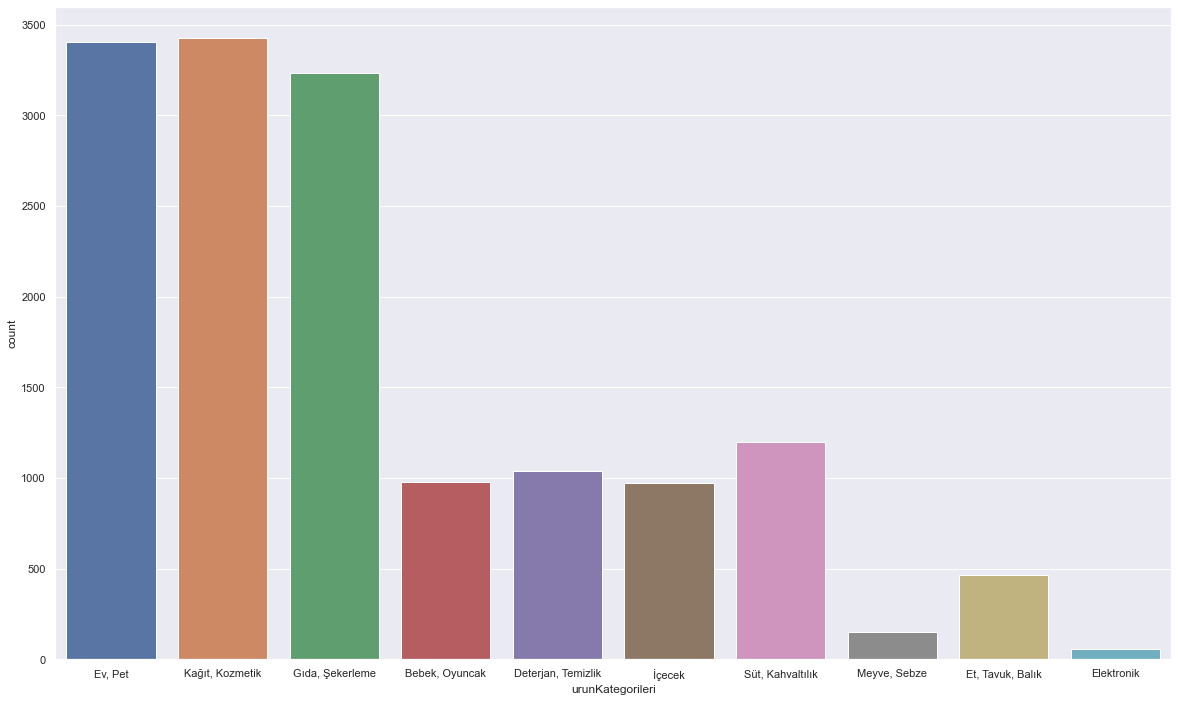

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(20, 12))

ax = sns.countplot(x="urunKategorileri", data=df)

In [22]:
kagitKozmetik=df[df["urunKategorileri"] == "Kağıt, Kozmetik"]

### Top 10 Kağıt Kozmetik Markaları

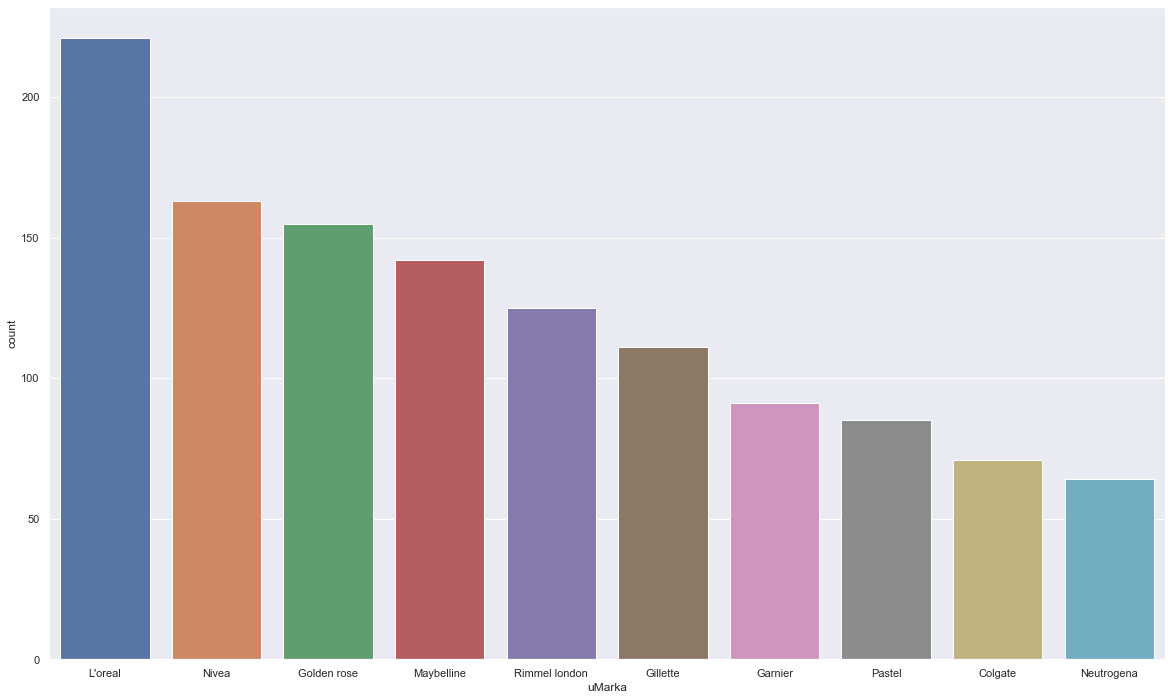

In [23]:
sns.set()
plt.figure(figsize=(20, 12))
sns.countplot(x='uMarka',data=kagitKozmetik,order=pd.value_counts(kagitKozmetik['uMarka']).iloc[:10].index)


### Aynı İsme Sahip Olan Ürünleri Listeleyelim

In [24]:
pd.value_counts(kagitKozmetik['urunAdi']).iloc[:3]

Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros    2
Eyüp Sabri Tuncer Çeşme Limonu Kolonyası 400 Ml - Migros             1
Tints Of Nature Saç Boyası Koyu Küllü Sarı 6C 120 Ml - Migros        1
Name: urunAdi, dtype: int64

In [25]:
# 1 Tane çıktı. İsimleri aynı açıklamaları farklı.

In [26]:
kagitKozmetik[kagitKozmetik.urunAdi == "Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros"]

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
104,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Saçın Yeniden Yapılandırılmasında Rol Oynayan En Önemli Aminoasitlerden\nBiri Olan Arginine Mikro Sirkülasyonu Hızlandırarak Saçı Kökten Uca Beslemeye\nYardımcı Olur. Saç Dökülmelerinde Gözle Görülür Azalma. Saçlar\ngüçlenerek uzar. Saçı dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Bir müşteri, aynı gün içerisinde, bu\nüründen en fazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri\nMigros Ticaret A.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255782/34255782_etiket-cd0481.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a6
103,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan Saçlar güçlenerek\nuzar. Saçı koparak dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Saçın yeniden yapılandırılmasında rol oynayan en\nönemli aminoasitlerden biri olan Arginine mikro sirkülasyonu hızlandırarak,\nsaçı kökten uca beslemeye yardımcı olur. Saç Dökülmelerinde Gözle\nGörülür Azalma Bir müşteri, aynı gün içerisinde, bu üründen en\nfazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri Migros Ticaret\nA.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255777/34255777_urundetay-b75b44.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a1


In [27]:
sutKahvalti=df[df["urunKategorileri"] == "Süt, Kahvaltılık"]

In [28]:
yumurta=sutKahvalti[sutKahvalti["urunKategorileriTwo"]=="Yumurta"]

In [29]:
yumurta.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,24,24,24,0,0,0,24,24,24,24
unique,12,1,1,0,0,0,24,24,24,24
top,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,Flotty Loves Organik Yumurta 6'Lı M Boy (53-62) G - Migros,"Flotty Loves Organik Yumurta 6';lı M Boy (53-62) g. , çocuğunuz ve kendi\nbeslenmeniz için güvenle kullanabilirsiniz. Flotty Loves Organik\nYumurta 6';lı M Boy (53-62) g. ürününü Migros Sanal Market';in Özel\nYumurtalar reyonundan satın alabilir, tek tıkla online sipariş verebilir,\nödemeyi online olarak ya da kapıda kredi kartı ile\ngerçekleştirebilirsiniz. Menşei TÜRKİYE Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı UMUT TAVUKÇULUK GIDA\nTARIM YEM HAYV.SAN.VE TİC.A.Ş Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001924/kor-organik-10-lu-m-orta-boy-yumurta-53-62-gr-049fa6.jpg,https://www.migros.com.tr/orvital-organik-10lu-m-orta-boy-yumurta-53-62-g-p-1313494
freq,7,24,24,NaN,NaN,NaN,1,1,1,1


In [30]:
yumurta.head(24)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
1132,Tire,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Tire Organik Yumurta 10'lu M Boy (53-62) G - Migros,"Tire Organik yumurta içeriği\naçısından oldukça yüksek besin değerine sahiptir.&;nbsp; Sertifikalandırılmış\norganik&;nbsp;tavuklarımız&;nbsp;GDO suz&;nbsp;ve kimyasal içermeyen yemler\nile ( Organik soya ve Organik mısır ) beslenmektedir. Satın alındıktan sonra buzdolabında soğukta muhafaza\nediniz. İşletme Kayıt\nNo TR35-0813 Menşei TÜRKİYE Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı SINIRLI SORUMLU TİRE\nORGANİK GIDA ÜRÜNL.ÜRET.VE TÜ Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001987/20001987-a3cb18.jpg,https://www.migros.com.tr/tire-organik-yumurta-10lu-m-boy-53-62-g-p-13134c3
1117,Güres,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Güres M - Orta Boy Yumurta 30'lu ( 53 - 62 G) - Migros,"Güres M Orta Boy Yumurta , kahvaltıların en besleyici lezzetlerinden\nbiri olarak sofralarınızda yerini alacak. Yumurta tüketimini\nkahvaltı ile sınırlandırmayarak, günün her öğününde kaliteli bir protein\nalabilirsiniz. Özellikle sağlıklı beslenmek isterken, pratik ve hızlı öğünler\nhazırlamayı tercih edenler için idealdir. İşletme Kayıt\nNo TR-45-0089 Kullanım Önerileri Satın\naldıktan sonra buzdolabında\nsaklayınız. Menşei TÜRKİYE İçindekiler Yumurta Saklama\nKoşulları 3-8 °C muhafaza ediniz Gıda İşletmecisi /\nÜretici / İthalatçı / Dağıtıcı GÜRES TAVUKÇULUK ÜRETİM PAZ.VE\nTİC.A.Ş. Ürün Bilgilerini Kullanma Hakkında İnternet\nsitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri,\nürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel\nbilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış\nkanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması\nhalinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20000243/20000243-d205c4.jpg,https://www.migros.com.tr/gures-m-orta-boy-yumurta-30lu-53-62-g-p-1312df3
1138,Nova,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Nova Yumurta Zarı Tozu Kapsülü 19.5 G - Migros,"İşletme Kayıt\nNo TR-35-K-035184/003901-14,02,2018 Kullanım\nÖnerileri İlaç değildir. Hastalık önlenmesi veya tedavi amacıyla\nkullanılmaz. Takviye edici gıdalar normal beslenmenin yerine geçmez. Tavsiye\nedilen günlük dozajı aşmayınız. Çocukların ulaşamayacağı yerde\nsaklayınız. Menşei TÜRKİYE İçindekiler Yumurta\nkabuğu , YUMURTA ZARI , ZERDEÇAL, ÇÖREKOTU Alerjen\nUyarısı yumurta içerir Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı KOR AGRO ORGANİK GIDA\nİNŞ.ENERJİ SAN.VE TİC.A.Ş. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20002000/20002000-7c03b9.jpg,https://www.migros.com.tr/nova-yumurta-zari-tozu-kapsulu-195-g-p-13134d0
1137,Nova,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Nova Yumurta Kabuğu Tozu Kapsülü 30 G - Migros,"İşletme Kayıt

In [31]:
df["urunAdi"] = df["urunAdi"].apply(clean_text)

most_15_words(df["urunAdi"])

In [32]:
category_list = df['urunKategorileri'].unique().tolist()
for category in category_list:
    most_15_words(df["urunAdi"][df["urunKategorileri"]==category],category)

Counter({'cm': 412, '': 276, 'li': 273, 'me': 215, 'touch': 214, 'paşabahçe': 177, 'lü': 162, 'g': 161, 'x': 161, 'c': 155, 'erkek': 133, 'l': 118, 'kalem': 116, 'a': 114, 'lı': 113, 'ml': 113, 'kadın': 107, 'kedi': 99, 'up': 97, 'bardağı': 97, 'kabı': 94, 'seti': 94, 'faber': 93, 'castel': 93, 'rol': 89, 'e': 85, 'çantası': 84, 'leva': 81, 'yaprak': 80, 'm': 77, 'lu': 76, 'maması': 69, 'lav': 69, 'porselen': 68, 'siyah': 65, 'w': 62, 'çorabı': 62, 'defter': 59, 'mavi': 59, 'plastik': 58, 'dunlop': 57, 'tabak': 56, 'kırmızı': 55, 'bardak': 54, 'çocuk': 53, 'çay': 53, 'kral': 50, 'şakir': 50, 'beyaz': 50, 'kg': 50, 'p': 50, 'house': 49, 'çorap': 48, 'penti': 46, 'meteksan': 45, 'terlik': 45, 'dreams': 45, 'kapak': 45, 'tavuklu': 44, 'set': 43, 'body': 43, 'pure': 43, 'nap': 43, 'pil': 43, 'party': 43, 'n': 42, 'boy': 41, 'renkli': 41, 'etli': 41, 'kupa': 40, 'bls': 40, 'saklama': 40, 'pembe': 40, 'su': 40, 'ahşap': 40, 'külotlu': 39, 'metal': 38, 'kuru': 38, 'boya': 38, 's': 38, 'cam': 